In [24]:
import pandas as pd

#affichage des premieres lignes
df = pd.read_csv('C:/Users/airac/Desktop/M2/CO2 Emissions_Canada.csv')
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [25]:
#taille du fichier
print(f"Nombre de lignes : {df.shape[0]}")  # Nombre de lignes
print(f"Nombre de colonnes : {df.shape[1]}")  # Nombre de colonnes

Nombre de lignes : 7385
Nombre de colonnes : 12


In [26]:
# extraire le type des données 
print(df.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


In [27]:
#Résumé statistique (colonnes numériques) :
print(df.describe())  # Moyenne, min, max, etc.

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

In [28]:

# affiche le nombre de valeurs manquantes 
print(df.isnull().sum())
#affichage du pourcentage des valeurs manquantes pour chaque colonne 
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64
Make                                0.0
Model                               0.0
Vehicle Class                       0.0
Engine Size(L)                      0.0
Cylinders                           0.0
Transmission                        0.0
Fuel Type                           0.0
Fuel Consumption City (L/100 km)    0.0
Fuel Consumption Hwy (L/100 km)     0.0
Fuel Consumption Comb (L/100 km)    0.0
Fuel Consumption Comb (mpg)         0.0
CO2 Emissions(g/km)                 0.0
dtype: float64


In [29]:
doublons = df.duplicated()
print(f"Nombre de doublons : {doublons.sum()}")

Nombre de doublons : 1103


In [30]:
# Supprimer les doublons (en gardant la première occurrence)
df_unique = df.drop_duplicates()

# Sauvegarder le DataFrame sans doublons dans un nouveau fichier CSV
#df_unique.to_csv('fichier_sans_doublons.csv', index=False)
#print("Le fichier sans doublons a été créé avec succès !")

print(df_unique)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

In [31]:
doublons = df_unique.duplicated()
print(f"Nombre de doublons : {doublons.sum()}")

Nombre de doublons : 0


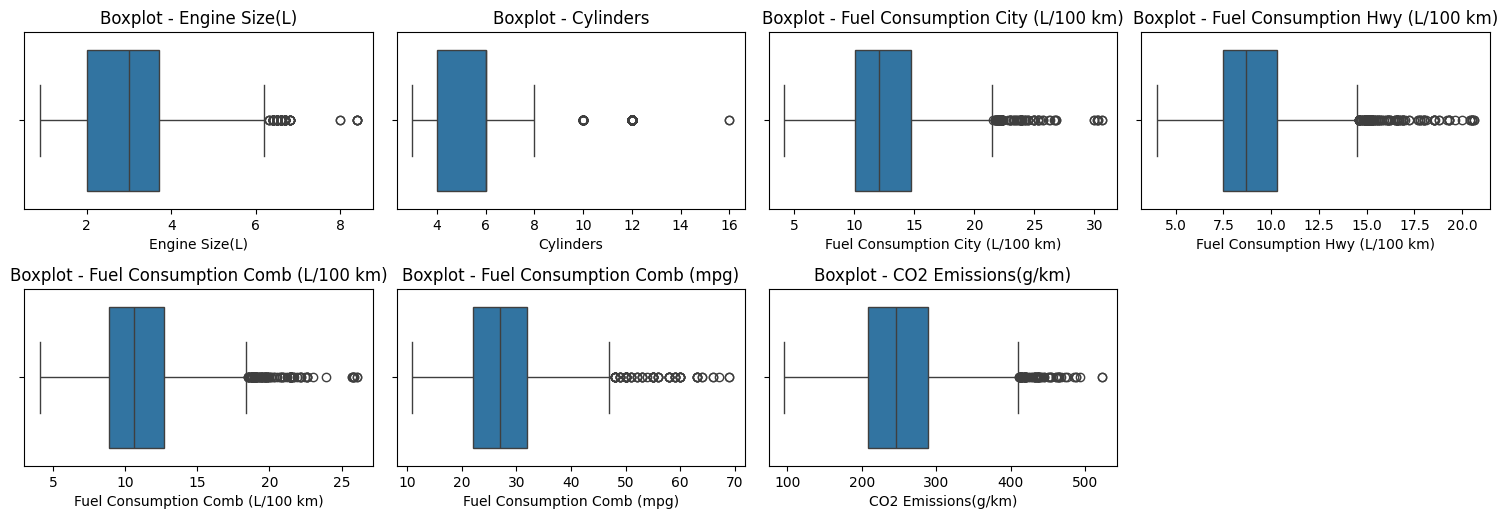

In [32]:

#valeurs aberantes
import seaborn as sns
import matplotlib.pyplot as plt
# Colonnes numériques à analyser
colonnes_numeriques = [
    'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
    'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'
]

# Visualiser les Graphiques Avant Détection
plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_unique, x=col)
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()



In [36]:
# Fonction pour détecter les valeurs aberrantes
def detecter_valeurs_aberrantes(df, colonnes):
    valeurs_aberrantes = {}
    
    for col in colonnes:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Définir les bornes
        borne_inferieure = Q1 - 1.5 * IQR
        borne_superieure = Q3 + 1.5 * IQR
        
        # Détecter les lignes aberrantes
        valeurs_aberrantes[col] = df[(df[col] < borne_inferieure) | (df[col] > borne_superieure)]
        
        # Afficher les statistiques
        print(f"Colonne: {col}")
       # print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
       # print(f"Borne inférieure: {borne_inferieure}, Borne supérieure: {borne_superieure}")
        print(f"Nombre de valeurs aberrantes: {len(valeurs_aberrantes[col])}\n")
        
    return valeurs_aberrantes

# Détection des valeurs aberrantes
valeurs_aberrantes = detecter_valeurs_aberrantes(df_unique, colonnes_numeriques)

Colonne: Engine Size(L)
Nombre de valeurs aberrantes: 121

Colonne: Cylinders
Nombre de valeurs aberrantes: 177

Colonne: Fuel Consumption City (L/100 km)
Nombre de valeurs aberrantes: 116

Colonne: Fuel Consumption Hwy (L/100 km)
Nombre de valeurs aberrantes: 150

Colonne: Fuel Consumption Comb (L/100 km)
Nombre de valeurs aberrantes: 115

Colonne: Fuel Consumption Comb (mpg)
Nombre de valeurs aberrantes: 95

Colonne: CO2 Emissions(g/km)
Nombre de valeurs aberrantes: 74



In [39]:
#supprimer les valeurs aberantes

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer la suppression des valeurs aberrantes à chaque colonne numérique
for column in df_unique.select_dtypes(include=['float64', 'int64']).columns:
    df_unique = remove_outliers(df_unique, column)

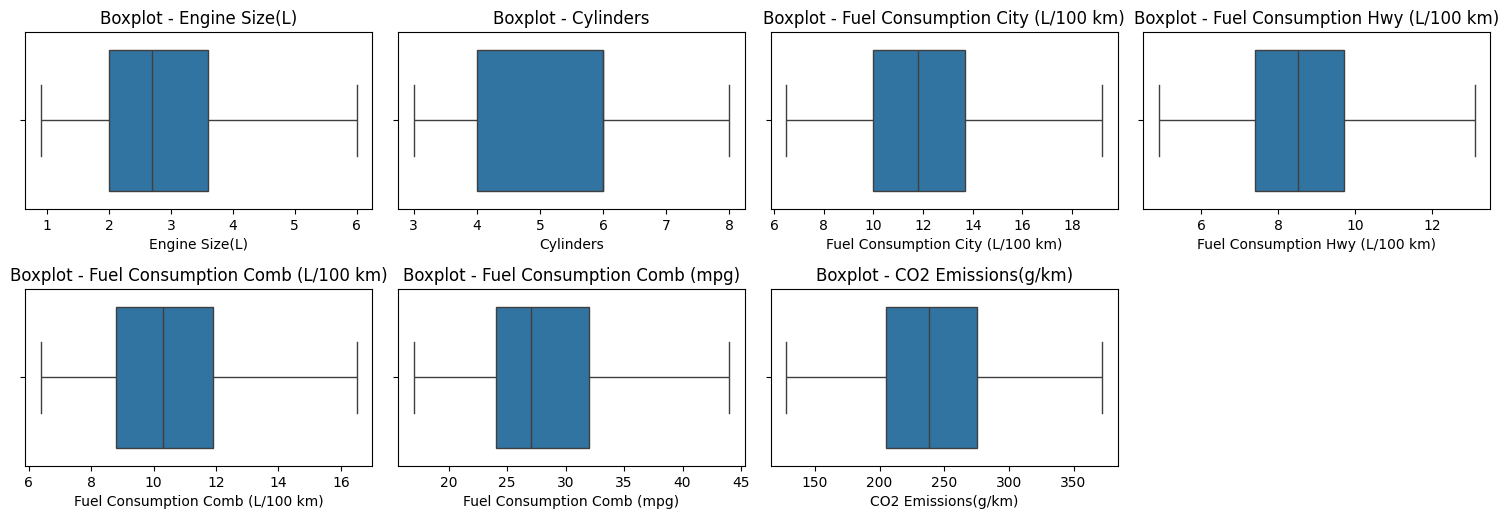

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
  
plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_unique, x=col)
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()

In [41]:
# Fonction pour détecter les valeurs aberrantes
def detecter_valeurs_aberrantes(df, colonnes):
    valeurs_aberrantes = {}
    
    for col in colonnes:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Définir les bornes
        borne_inferieure = Q1 - 1.5 * IQR
        borne_superieure = Q3 + 1.5 * IQR
        
        # Détecter les lignes aberrantes
        valeurs_aberrantes[col] = df[(df[col] < borne_inferieure) | (df[col] > borne_superieure)]
        
        # Afficher les statistiques
        print(f"Colonne: {col}")
        #print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        #print(f"Borne inférieure: {borne_inferieure}, Borne supérieure: {borne_superieure}")
        print(f"Nombre de valeurs aberrantes: {len(valeurs_aberrantes[col])}\n")
        
    return valeurs_aberrantes

# Détection des valeurs aberrantes
valeurs_aberrantes = detecter_valeurs_aberrantes(df_unique, colonnes_numeriques)

Colonne: Engine Size(L)
Nombre de valeurs aberrantes: 0

Colonne: Cylinders
Nombre de valeurs aberrantes: 0

Colonne: Fuel Consumption City (L/100 km)
Nombre de valeurs aberrantes: 0

Colonne: Fuel Consumption Hwy (L/100 km)
Nombre de valeurs aberrantes: 0

Colonne: Fuel Consumption Comb (L/100 km)
Nombre de valeurs aberrantes: 0

Colonne: Fuel Consumption Comb (mpg)
Nombre de valeurs aberrantes: 0

Colonne: CO2 Emissions(g/km)
Nombre de valeurs aberrantes: 0



 Vérifications de Consistance
a. Relations Logiques

In [19]:
# la conssistance
incoh_fuel = df_unique[df_unique['Fuel Consumption City (L/100 km)'] > df_unique['Fuel Consumption Hwy (L/100 km)']]
print("\nIncohérences de consommation de carburant :")
print(incoh_fuel[['Make', 'Model', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']])


Incohérences de consommation de carburant :
       Make        Model  Fuel Consumption City (L/100 km)  \
0     ACURA          ILX                               9.9   
1     ACURA          ILX                              11.2   
3     ACURA      MDX 4WD                              12.7   
4     ACURA      RDX AWD                              12.1   
5     ACURA          RLX                              11.9   
...     ...          ...                               ...   
7380  VOLVO  XC40 T5 AWD                              10.7   
7381  VOLVO  XC60 T5 AWD                              11.2   
7382  VOLVO  XC60 T6 AWD                              11.7   
7383  VOLVO  XC90 T5 AWD                              11.2   
7384  VOLVO  XC90 T6 AWD                              12.2   

      Fuel Consumption Hwy (L/100 km)  
0                                 6.7  
1                                 7.7  
3                                 9.1  
4                                 8.7  
5         

Les résultats montrent des incohérences dans les colonnes Fuel Consumption City (L/100 km) et Fuel Consumption Hwy (L/100 km). Voici l'explication :

1. Définition des Colonnes
Fuel Consumption City (L/100 km) : Consommation de carburant en ville.
Fuel Consumption Hwy (L/100 km) : Consommation de carburant sur autoroute.
En général, Fuel Consumption City devrait être supérieure ou égale à Fuel Consumption Hwy, car les véhicules consomment plus de carburant en ville (arrêts fréquents, embouteillages) que sur autoroute (conduite continue).

4. Solution Proposée
Pour corriger ces incohérences, on peut :

a. Identifier les Lignes Concernées
python
Copier le code
# Filtrer les incohérences
incoh_fuel = df[df['Fuel Consumption City (L/100 km)'] < df['Fuel Consumption Hwy (L/100 km)']]
print(incoh_fuel)
b. Correction Automatique (Optionnelle)
Si on suppose que la ville doit toujours être ≥ autoroute, on peut inverser les valeurs incorrectes :

python
Copier le code
# Correction automatique
df.loc[df['Fuel Consumption City (L/100 km)'] < df['Fuel Consumption Hwy (L/100 km)'], 
       ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']] = \
df.loc[df['Fuel Consumption City (L/100 km)'] < df['Fuel Consumption Hwy (L/100 km)'], 
       ['Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']].values
c. Supprimer les Lignes Incorrectes (Option)
python
Copier le code
# Supprimer les lignes incohérentes
df = df[df['Fuel Consumption City (L/100 km)'] >= df['Fuel Consumption Hwy (L/100 km)']]

In [20]:
# taille du moteur et les cylindres 
incoh_engine = df_unique[(df_unique['Engine Size(L)'] <= 0) | (df_unique['Cylinders'] <= 0)]
print("\nMoteurs avec des tailles ou des cylindres invalides :")
print(incoh_engine[['Make', 'Model', 'Engine Size(L)', 'Cylinders']])


Moteurs avec des tailles ou des cylindres invalides :
Empty DataFrame
Columns: [Make, Model, Engine Size(L), Cylinders]
Index: []


Cela signifie que toutes les données de la colonne "Engine Size(L)" (taille du moteur en litres) et de la colonne "Cylinders" (nombre de cylindres) sont valides selon les critères définis dans le code.

Pourquoi ce test ?
La taille du moteur (Engine Size) et le nombre de cylindres sont des propriétés physiques des véhicules, et il n'a pas de sens qu'un moteur ait une taille nulle ou négative, ou qu'un véhicule ait un nombre de cylindres égal à zéro ou négatif.

Que signifie "Empty DataFrame" ?
Un "Empty DataFrame" signifie qu'après avoir appliqué le filtre (recherche des valeurs invalides), aucune ligne n'a été trouvée qui réponde à cette condition. Cela indique que toutes les données dans ces colonnes sont valides.

In [21]:
# Vérifier si les véhicules électriques ont une consommation et des émissions nulles
incoh_electric = df_unique[(df_unique['Fuel Type'] == 'Electric') & 
                    ((df_unique['Fuel Consumption Comb (L/100 km)'] > 0) | 
                     (df_unique['CO2 Emissions(g/km)'] > 0))]
print("\nVéhicules électriques avec consommation ou émissions incorrectes :")
print(incoh_electric[['Make', 'Model', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']])




Véhicules électriques avec consommation ou émissions incorrectes :
Empty DataFrame
Columns: [Make, Model, Fuel Type, Fuel Consumption Comb (L/100 km), CO2 Emissions(g/km)]
Index: []


Cela signifie que toutes les données concernant les véhicules électriques (identifiés par "Fuel Type" avec la valeur "Electric") sont valides selon les critères de vérification définis dans le code.

Le type de carburant est "Electric".
La consommation de carburant est supérieure à 0 (ce qui est incorrect pour un véhicule électrique).
Les émissions de CO2 sont supérieures à 0 (ce qui est également incorrect pour un véhicule électrique).
Résultat vide (Empty DataFrame) : Le fait qu'aucune ligne ne soit retournée signifie qu'il n'y a aucune ligne dans votre jeu de données qui correspond à la condition de consommation ou d'émissions incorrectes pour les véhicules électriques. Cela indique que tous les véhicules électriques dans votre fichier ont des données valides pour la consommation de carburant et les émissions de CO2.

Si un véhicule électrique a une consommation de carburant, cela serait incohérent, car les véhicules électriques ne consomment pas de carburant liquide (essence ou diesel).
Si un véhicule électrique a des émissions de CO2, cela serait également incohérent, car les véhicules électriques n'émettent pas de CO2 pendant leur fonctionnement

Pourquoi ce test ?
Les véhicules électriques doivent avoir une consommation de carburant égale à 0 (ou absente) et des émissions de CO2 égales à 0. S'ils ont des valeurs non nulles dans ces colonnes, cela signifie qu'il y a une incohérence dans les données.

Que signifie "Empty DataFrame" ?
Un "Empty DataFrame" signifie qu'après avoir appliqué le filtre (recherche des incohérences), aucune ligne n'a été trouvée qui réponde à cette condition. Cela signifie que tous les véhicules électriques dans votre jeu de données ont des valeurs cohérentes (c'est-à-dire une consommation de carburant nulle ou absente et des émissions de CO2 nulles).

In [22]:
#Consommation de Carburant Trop Faible/Élevée
incoh_fuel_comb = df_unique[(df_unique['Fuel Consumption Comb (L/100 km)'] <= 2) | 
                     (df['Fuel Consumption Comb (L/100 km)'] > 25)]
print("\nConsommation de carburant combinée suspecte :")
print(incoh_fuel_comb[['Make', 'Model', 'Fuel Consumption Comb (L/100 km)']])



Consommation de carburant combinée suspecte :
Empty DataFrame
Columns: [Make, Model, Fuel Consumption Comb (L/100 km)]
Index: []


C:\Users\airac\AppData\Local\Temp\ipykernel_11716\510679036.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incoh_fuel_comb = df_unique[(df_unique['Fuel Consumption Comb (L/100 km)'] <= 2) |


Cela signifie que les véhicules listés ont des consommations de carburant combinées relativement élevées (de l'ordre de 25.7 à 26.1 L/100 km), ce qui peut être considéré comme suspect pour certains types de véhicules, surtout en tenant compte de leur type (vans et véhicules utilitaires de grande taille). Ces valeurs de consommation peuvent être anormalement élevées pour certains modèles par rapport à des véhicules similaires.

In [23]:
incoh_co2 = df_unique[df_unique['CO2 Emissions(g/km)'] <= 0]
print("\nEmissions CO2 non valides :")
print(incoh_co2[['Make', 'Model', 'CO2 Emissions(g/km)']])


Emissions CO2 non valides :
Empty DataFrame
Columns: [Make, Model, CO2 Emissions(g/km)]
Index: []


signifie que aucune émission de CO2 non valide n'a été détectée dans votre dataset pour les véhicules.

Le code vérifie la validité des valeurs dans la colonne CO2 Emissions(g/km). L'objectif est de détecter les valeurs qui pourraient être incorrectes, comme des émissions de CO2 qui seraient trop élevées ou trop basses, voire nulles pour certains types de véhicules (par exemple, pour les véhicules électriques, les émissions de CO2 devraient être proches de zéro).

In [21]:
# Correction Automatique (Optionnelle)
#Si on suppose que la ville doit toujours être ≥ autoroute, on peut inverser les valeurs incorrectes :


# Correction automatique
df_unique.loc[df_unique['Fuel Consumption City (L/100 km)'] < df_unique['Fuel Consumption Hwy (L/100 km)'], 
       ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']] = \
df_unique.loc[df_unique['Fuel Consumption City (L/100 km)'] < df_unique['Fuel Consumption Hwy (L/100 km)'], 
       ['Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']].values

In [22]:
# vrerification 
incoh_fuel = df_unique[df_unique['Fuel Consumption City (L/100 km)'] < df_unique['Fuel Consumption Hwy (L/100 km)']]

if incoh_fuel.empty:
    print("Toutes les incohérences ont été corrigées, les cities consomme plus ")
else:
    print("Certaines incohérences persistent :")
    print(incoh_fuel[['Make', 'Model', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']])


Toutes les incohérences ont été corrigées, les cities consomme plus 


La correlation 

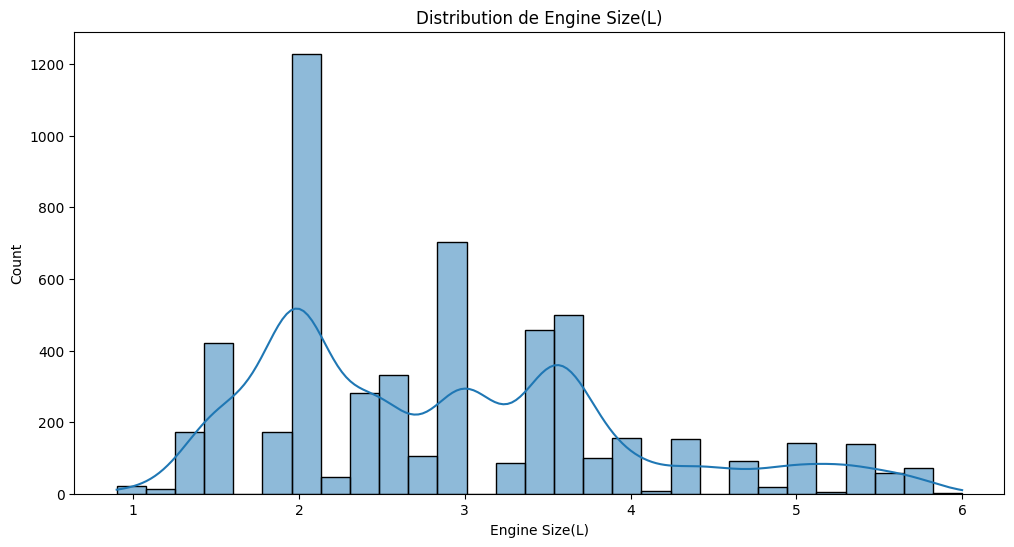

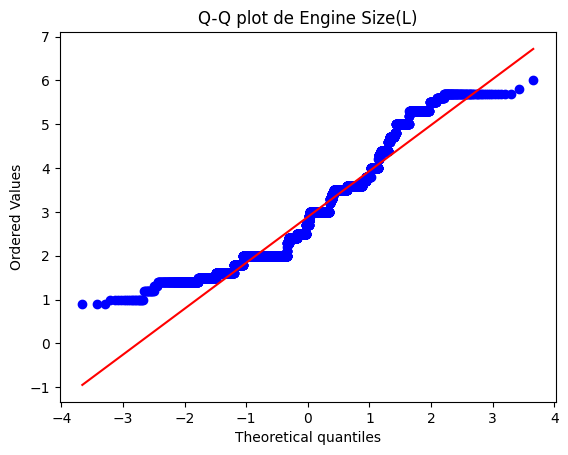

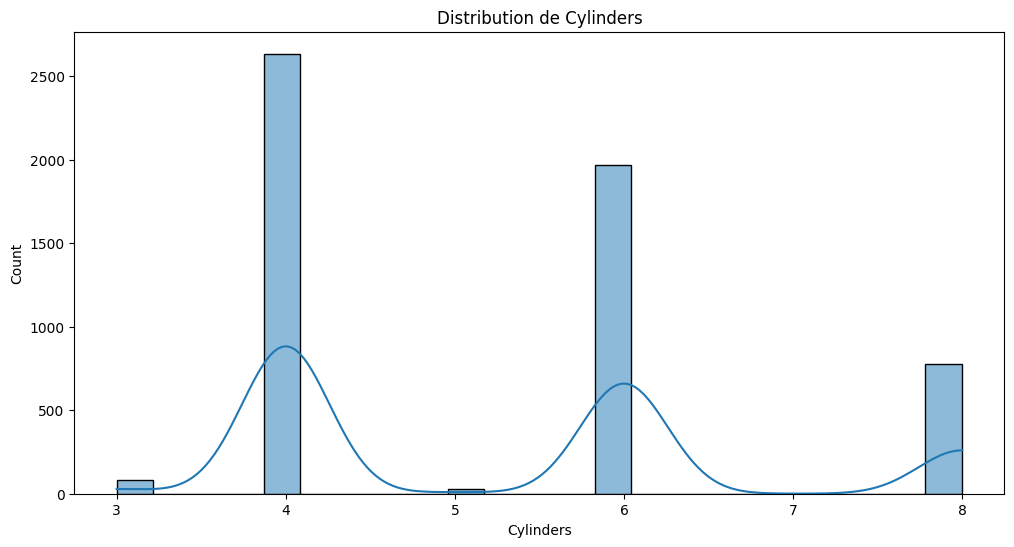

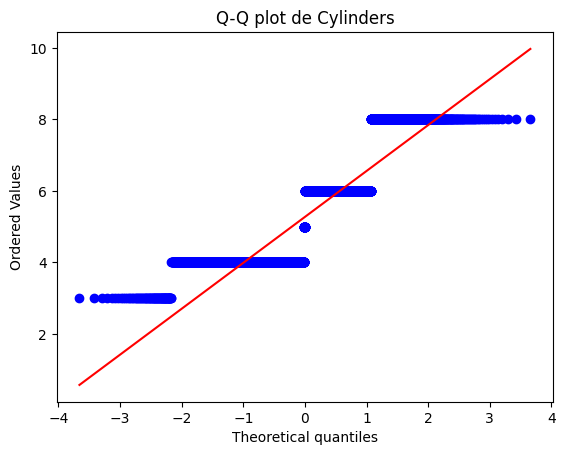

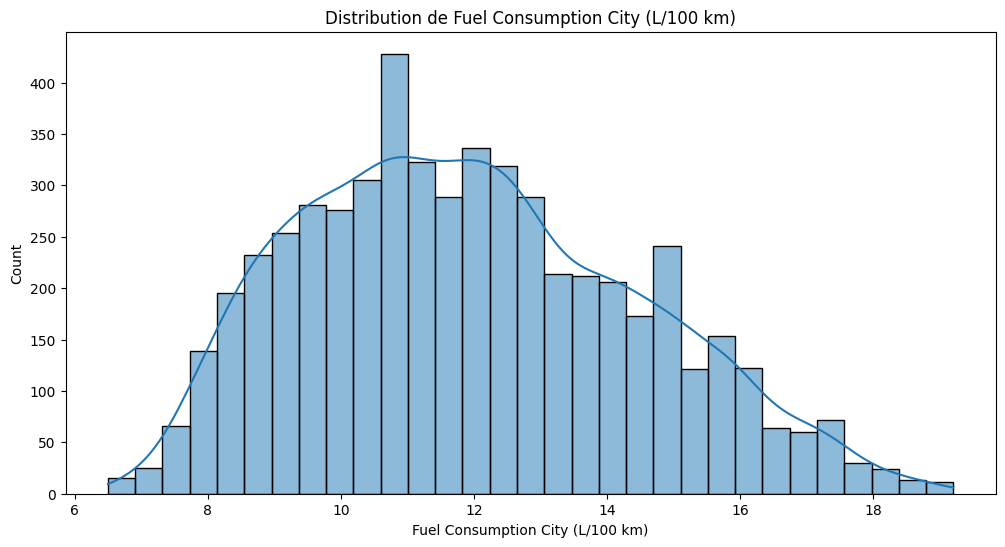

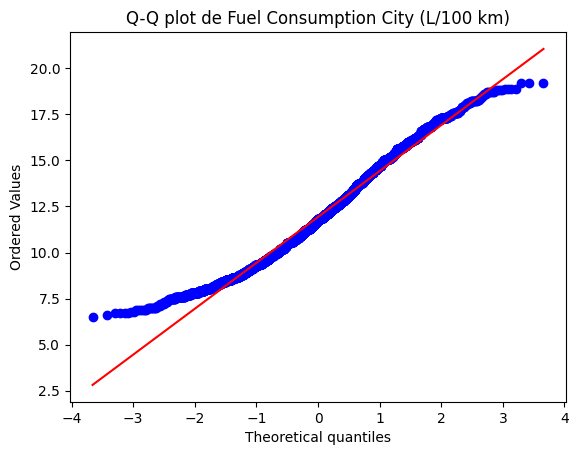

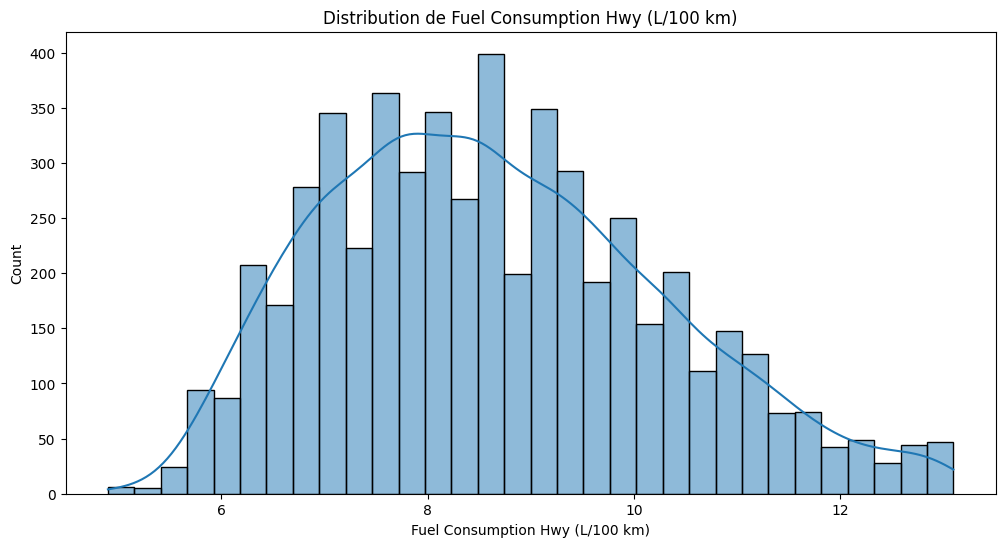

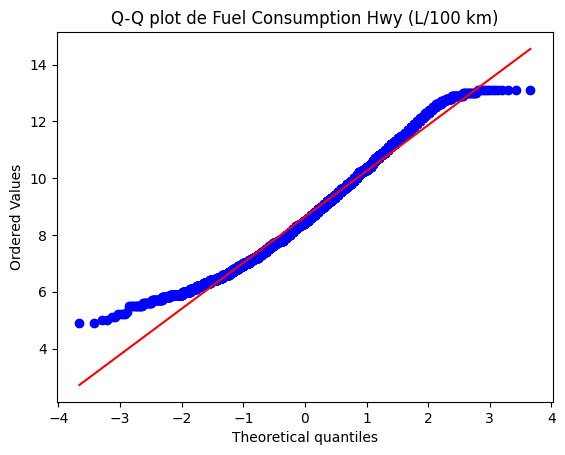

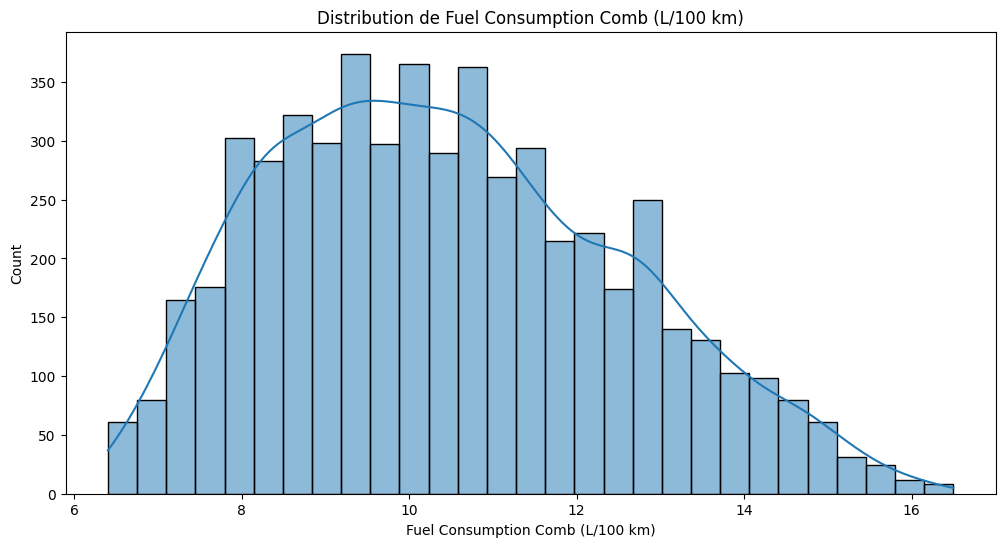

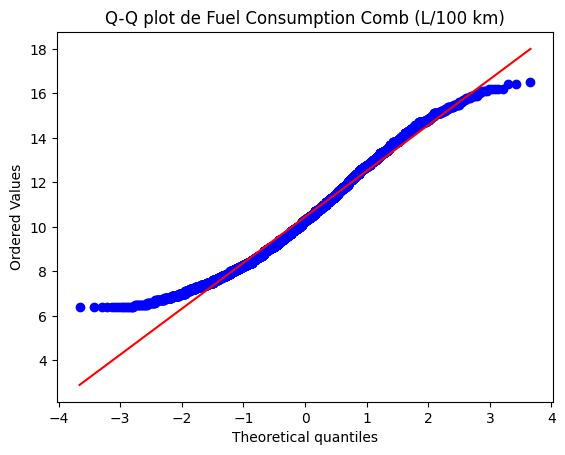

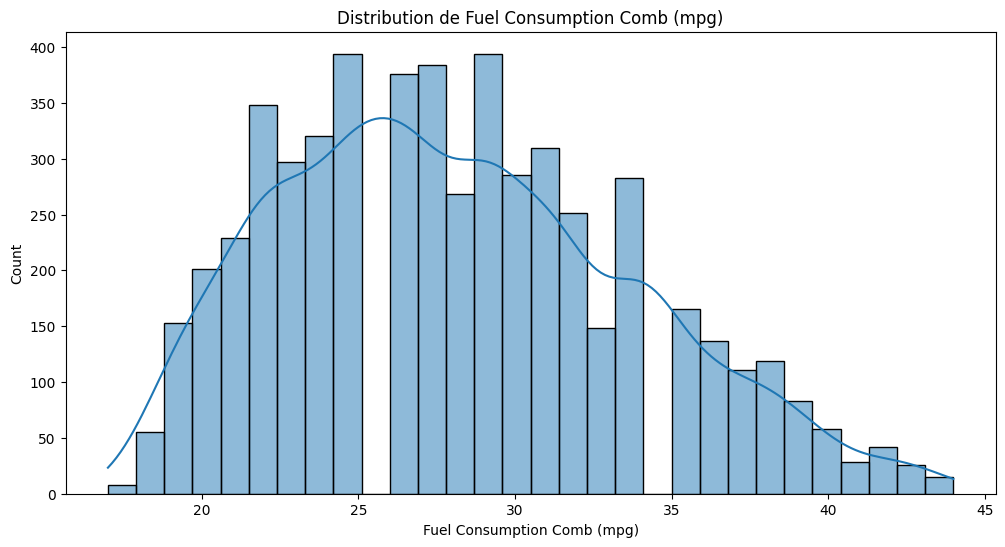

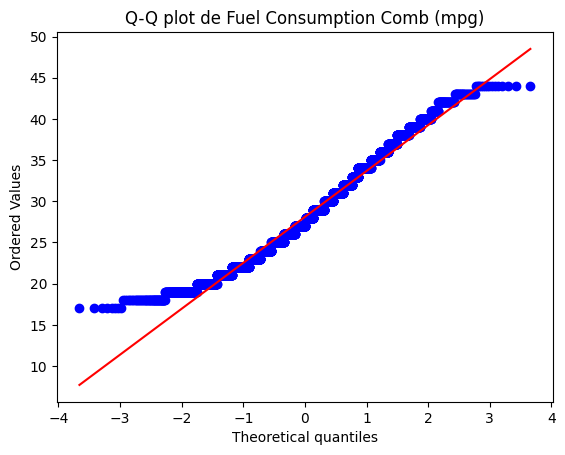

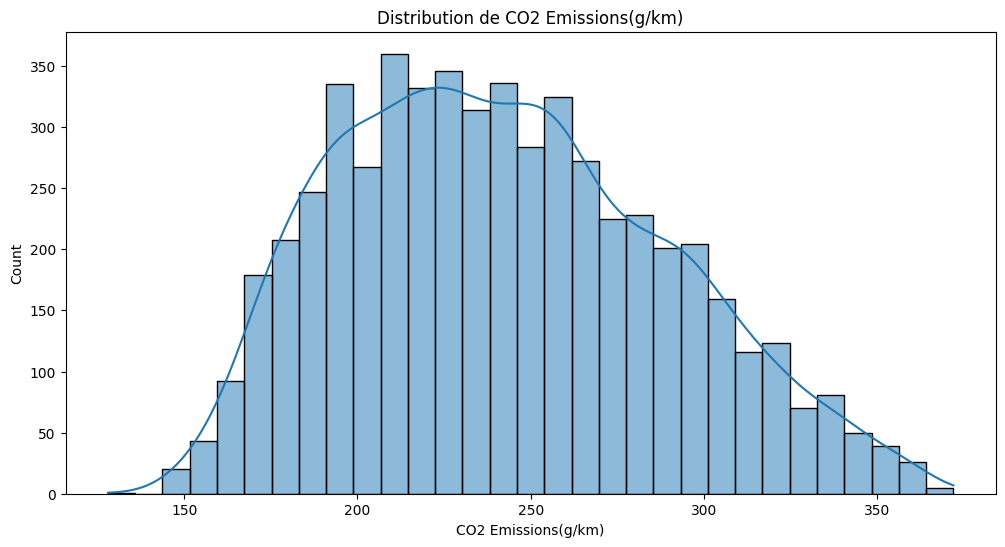

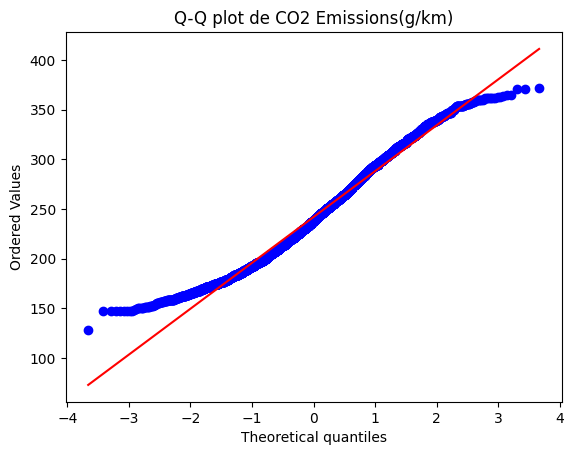

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Visualiser la distribution de chaque variable continue
variables = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
             'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
             'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

for var in variables:
    plt.figure(figsize=(12, 6))
    
    # Histogramme avec une courbe de densité
    sns.histplot(df_unique[var], kde=True)
    plt.title(f"Distribution de {var}")
    plt.show()

    # Q-Q plot pour tester la normalité
    stats.probplot(df_unique[var].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot de {var}")
    plt.show()


on commence par le teste de corelation puis la normalisation 

In [43]:
from scipy.stats import kstest

# Vérifier la normalité des colonnes numériques avec Kolmogorov-Smirnov
for var in df_unique.select_dtypes(include=['float64', 'int64']).columns:
    _, p_value = kstest(df_unique[var], 'norm')
    print(f"Test de Kolmogorov-Smirnov pour {var} : p-value = {p_value}")

Test de Kolmogorov-Smirnov pour Engine Size(L) : p-value = 0.0
Test de Kolmogorov-Smirnov pour Cylinders : p-value = 0.0
Test de Kolmogorov-Smirnov pour Fuel Consumption City (L/100 km) : p-value = 0.0
Test de Kolmogorov-Smirnov pour Fuel Consumption Hwy (L/100 km) : p-value = 0.0
Test de Kolmogorov-Smirnov pour Fuel Consumption Comb (L/100 km) : p-value = 0.0
Test de Kolmogorov-Smirnov pour Fuel Consumption Comb (mpg) : p-value = 0.0
Test de Kolmogorov-Smirnov pour CO2 Emissions(g/km) : p-value = 0.0


On a : Si p-valeur ≥ 0.05, la variable suit une distribution normale. Si p-valeur < 0.05, la variable ne suit pas une distribution normale.

Dans ce cas : Toutes les p-valeurs sont extrêmement < 0.05, donc toutes les variables numériques du dataset ne suivent pas une loi normale.

Pour étudier les corrélations entre les variables numériques, Nous avons choisi d'utiliser la matrice de corrélation car elle permet une analyse exploratoire rapide des relations. Comme les variables de notre dataset ne suivent pas une distribution normale, la corrélation avec Spearman et Kendall, sont plus robustes aux distributions non normales et permettent de détecter des relations monotones.

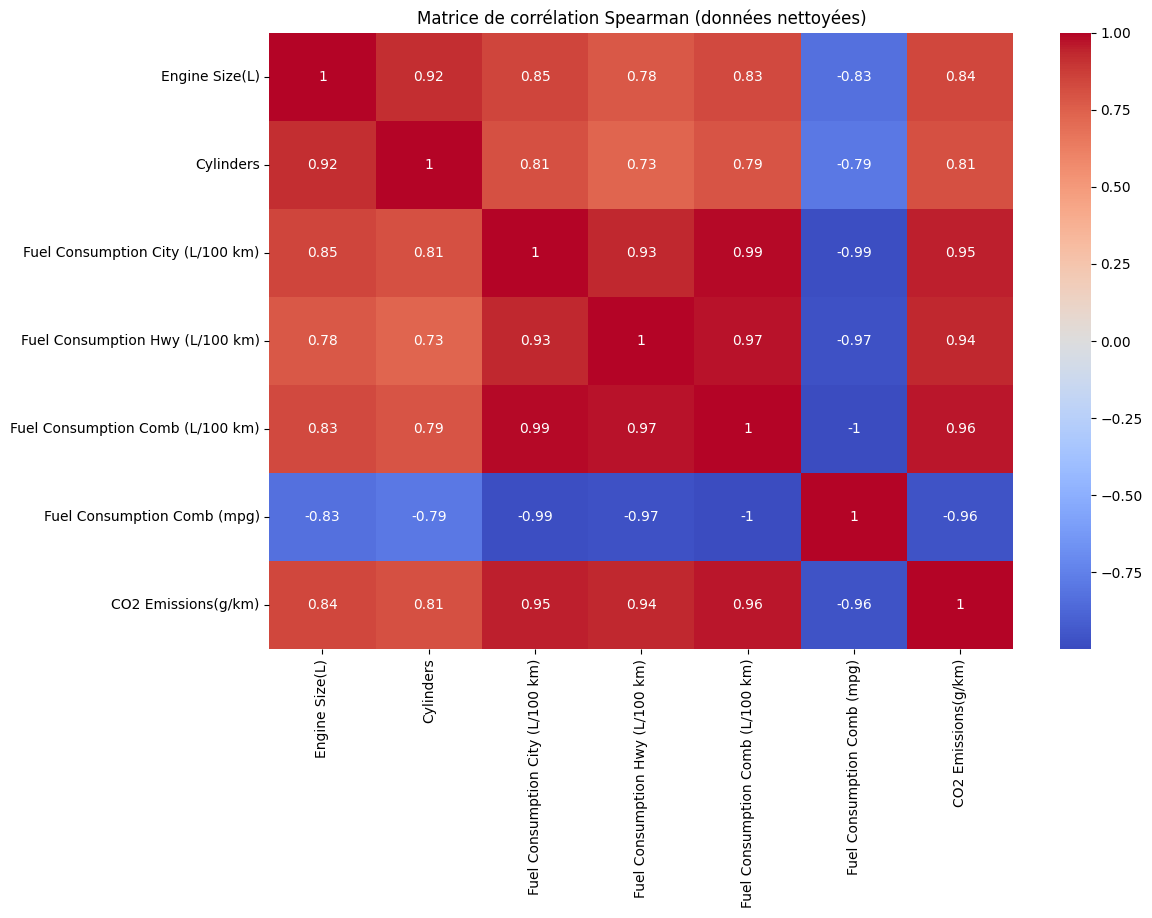

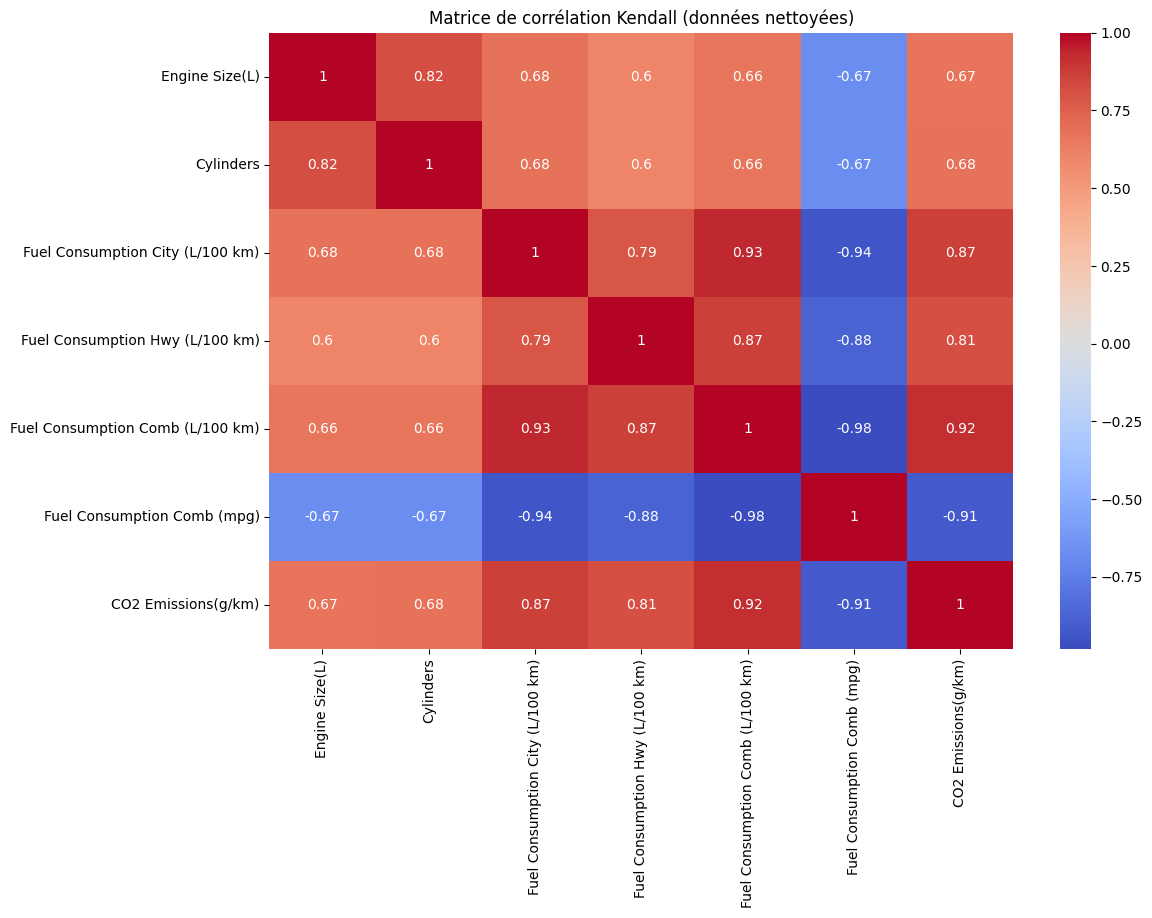

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer uniquement les colonnes numériques dans df_unique
numeric_df_unique = df_unique.select_dtypes(include=['float64', 'int64'])

# Calcul des deux matrices de corrélation
spearman_corr_unique = numeric_df_unique.corr(method='spearman')  # Relation monotone
kendall_corr_unique = numeric_df_unique.corr(method='kendall')    # Relation monotone robuste

# Afficher les matrices sous forme de heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr_unique, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation Spearman (données nettoyées)")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(kendall_corr_unique, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation Kendall (données nettoyées)")
plt.show()


Relation entre CO2 Emissions (g/km) et les autres variables :

Fuel Consumption Comb (L/100 km) : Très forte corrélation positive (Spearman = 0.96, Kendall = 0.92). Cela confirme que la consommation combinée de carburant est le facteur le plus influent sur les émissions de CO2. Les véhicules consommant davantage de carburant émettent plus de CO2.

Fuel Consumption City (L/100 km) et Fuel Consumption Hwy (L/100 km) : Corrélations fortes avec les émissions de CO2 (Spearman : 0.95 et 0.94 respectivement, Kendall : 0.87 et 0.81). Ces variables influencent également significativement les émissions, mais légèrement moins que la consommation combinée.

Engine Size (L) : Corrélation significative avec CO2 Emissions (Spearman = 0.84, Kendall = 0.67). Cela montre que les véhicules avec des moteurs plus grands ont tendance à émettre davantage de CO2.

Cylinders : Corrélation moyenne (Spearman = 0.81, Kendall = 0.68). Cylinders est corrélé avec Engine Size: Les véhicules avec un plus grand nombre de cylindres consomment généralement plus de carburant et, par conséquent, émettent davantage de CO2, ce qui implique son impact sur la variable CO2 Emissions.

Afin de vérifier si Fuel Consumption City et Fuel Consumption Hwy pourraient être redondants avec Fuel Consumption Comb, on calcule la correlation entre ces trois variables

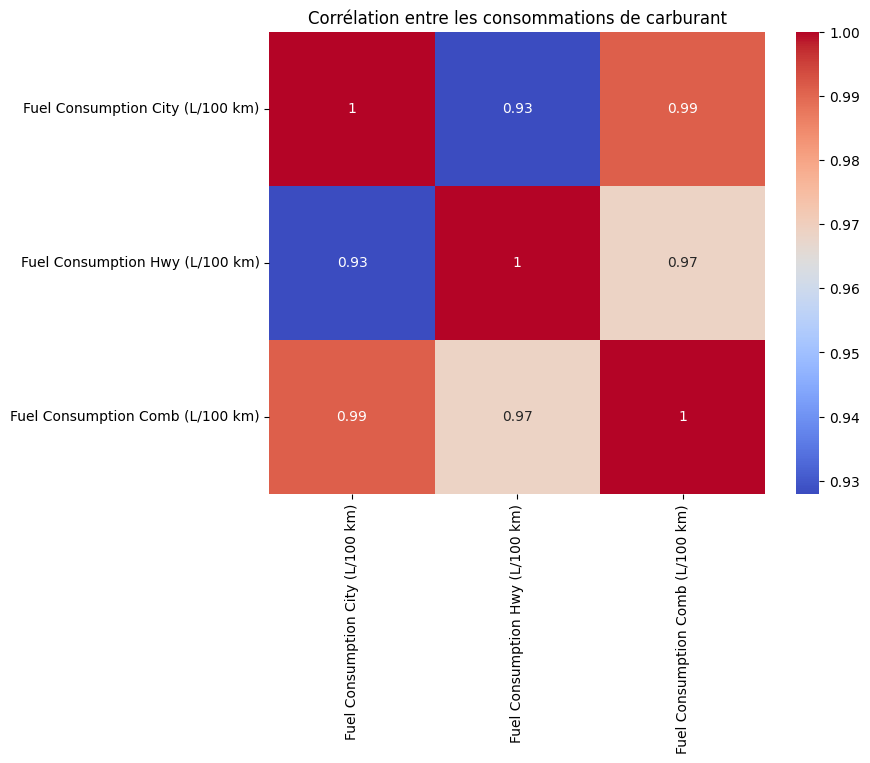

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation pour les trois variables
corr_matrix = df_unique[['Fuel Consumption City (L/100 km)', 
                          'Fuel Consumption Hwy (L/100 km)', 
                          'Fuel Consumption Comb (L/100 km)']].corr()

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Corrélation entre les consommations de carburant")
plt.show()

Les résultats montrent que Fuel Consumption Comb (L/100 km) capture déjà la majorité de l’information contenue dans Fuel Consumption City et Fuel Consumption Hwy. Pour éviter la multicolinéarité et la redondance dans le modèle, il est suffisant de conserver uniquement Fuel Consumption Comb (L/100 km).

Conclusion: Les variables Fuel Consumption Comb (L/100 km), Fuel Consumption City (L/100 km), et Fuel Consumption Hwy (L/100 km) sont les plus corrélées avec les émissions de CO2. Cela signifie que la consommation de carburant est le facteur principal à considérer dans la prédiction des émissions.

Les relations très fortes (entre consommation en ville, sur autoroute et combinée) peuvent indiquer une redondance des variables. Il pourrait être utile de supprimer certaines de ces variables pour éviter la multicolinéarité.

Engine Size (L) et Cylinders sont également des facteurs en corrélation avec CO2 Emissions

Analyse des relations qualitatives - quantitatives

a. Visualisation graphique avec des boxplots

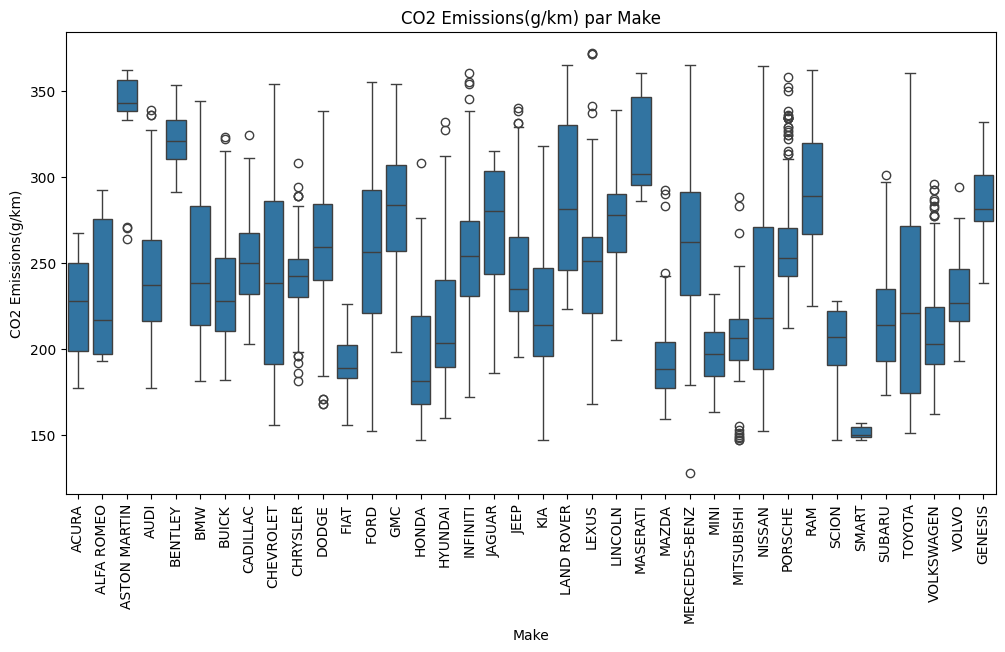

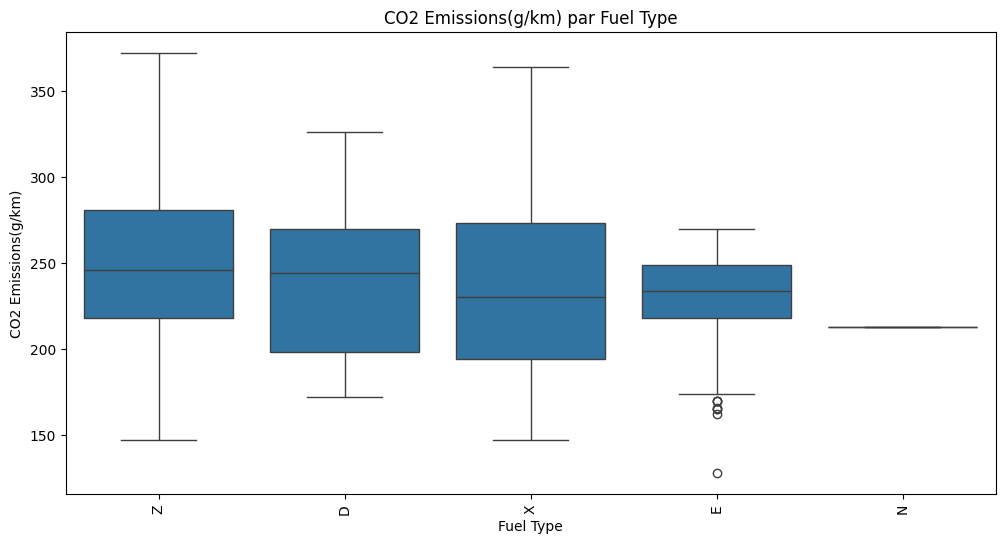

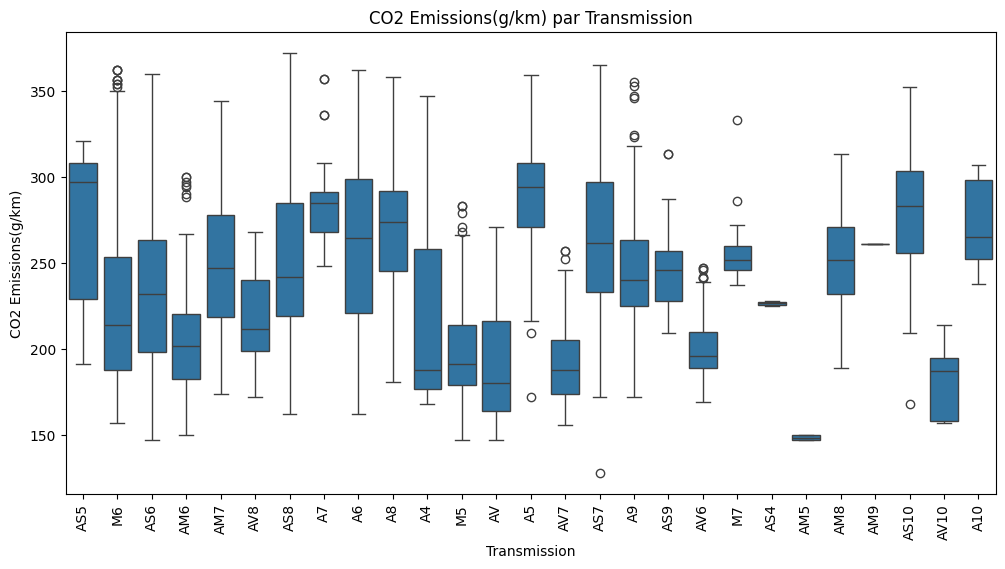

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables qualitatives
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']

# Variable quantitative à analyser
quantitative_var = 'CO2 Emissions(g/km)'

for var in qualitative_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_unique, x=var, y=quantitative_var)
    plt.xticks(rotation=90)  # Rotation pour mieux voir les catégories si elles sont nombreuses
    plt.title(f"{quantitative_var} par {var}")
    plt.show()

b. Analyse numérique: Dans cette étape, nous avons choisi d'utiliser Kruskal-Wallis pour tester l'influence des variables qualitatives (Make, Fuel Type, Transmission) sur la variable quantitative CO2 Emissions(g/km). Kruskal-Wallis ne fait aucune hypothèse sur la distribution des données. Il est donc adapté pour comparer des groupes lorsque les données ne suivent pas une loi normale Si la p-valeur < 0,05, la variable influence significativement les émissions.

In [47]:
from scipy.stats import kruskal

# Liste des variables qualitatives
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']
# Variable quantitative
quantitative_var = 'CO2 Emissions(g/km)'

for var in qualitative_vars:
    # Grouper les données selon les catégories de la variable qualitative
    groups = [df_unique[df_unique[var] == category][quantitative_var] for category in df_unique[var].unique()]
    # Appliquer le test de Kruskal-Wallis
    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis pour {var} et {quantitative_var}: stat = {stat}, p-value = {p_value}")

Kruskal-Wallis pour Make et CO2 Emissions(g/km): stat = 1689.091666572887, p-value = 0.0
Kruskal-Wallis pour Fuel Type et CO2 Emissions(g/km): stat = 146.7412931137421, p-value = 1.0160957241627692e-30
Kruskal-Wallis pour Transmission et CO2 Emissions(g/km): stat = 1316.3539598978248, p-value = 2.0189406646410616e-261


Pour chacune des variables qualitatives, les résultats montrent une p-valeur extrêmement faible (p < 0,05), ce qui indique que : La marque (Make) a une influence significative sur les émissions de CO2. Le type de carburant (Fuel Type) est également un facteur influençant. La transmission (Transmission) a un effet significatif sur les émissions. Ces résultats confirment que ces variables qualitatives doivent être prises en compte dans l'analyse des facteurs influençant les émissions de CO2.

In [48]:
from scipy.stats import chi2_contingency

# Liste des variables qualitatives
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']

# Tester toutes les paires de variables qualitatives
for i in range(len(qualitative_vars)):
    for j in range(i + 1, len(qualitative_vars)):
        var1 = qualitative_vars[i]
        var2 = qualitative_vars[j]
        
        # Créer une table de contingence
        contingency_table = pd.crosstab(df_unique[var1], df_unique[var2])
        # Test du Chi²
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi² entre {var1} et {var2}: Chi² = {chi2}, p-value = {p}")

Chi² entre Make et Fuel Type: Chi² = 4882.102842822265, p-value = 0.0
Chi² entre Make et Transmission: Chi² = 25655.22804934746, p-value = 0.0
Chi² entre Fuel Type et Transmission: Chi² = 2655.1215275270424, p-value = 0.0


Make et Fuel Type : Chi² = 4882.10, p-value = 0.0 Cela indique une relation significative entre la marque du véhicule et le type de carburant utilisé. Certaines marques semblent privilégier des carburants spécifiques.

Make et Transmission :Chi² = 25655.23, p-value = 0.0 Une association forte est observée entre la marque et le type de transmission. Les constructeurs automobiles associent probablement leurs marques à des technologies de transmission précises.

Fuel Type et Transmission : Chi² = 2655.12, p-value = 0.0 Le type de carburant est significativement lié au choix de la transmission. Certains carburants pourraient être optimisés pour des types spécifiques de transmission.

Conclusion : Ces variables qualitatives ne sont pas indépendantes. Par exemple : Les marques ont des préférences pour des combinaisons spécifiques de carburant et de transmission. Le choix du type de carburant influence celui de la transmission.

En combinant tous les résultats, les variables à conserver sont:

Fuel Consumption Comb (L/100 km) (priorité principale). Engine Size (L). Cylinders Make : Pour observer les variations entre marques. Fuel Type : Pour analyser l’impact du carburant sur les émissions. Transmission : Pour inclure les effets de la transmission sur les émissions.

In [49]:
# Variables numériques à conserver (issues de data_unique)
numerical_vars = [
    'Fuel Consumption Comb (L/100 km)',
    'Engine Size(L)',
    'Cylinders'
]

# Variables descriptives à conserver (issues du dataset original)
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']

# Sélection des variables numériques depuis data_cleaned
numerical_data = df_unique[numerical_vars]

# Sélection des variables qualitatives depuis le dataset original (df)
qualitative_data = df[qualitative_vars] 

# Combiner les deux ensembles en un seul dataset
df_selected = pd.concat([numerical_data, qualitative_data], axis=1)

# Afficher les dimensions et un aperçu du dataset résultant
print("Dimensions du dataset sélectionné :", df_selected.shape)

Dimensions du dataset sélectionné : (7385, 6)


Normalisation
La normalisation transforme les données pour qu'elles soient sur la même échelle, facilitant leur traitement par les algorithmes. Elle garantit que les modèles ne soient pas influencés de manière disproportionnée par des variables à grande échelle. Certains algorithmes comme la régression linéaire fonctionnent mieux avec des données normalisées.

In [50]:
# la normalisation 

from sklearn.preprocessing import StandardScaler

# Sélection des colonnes numériques à normaliser depuis df_unique
numeric_columns = df_selected.select_dtypes(include=['float64', 'int64']).columns

# Instancier le scaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes numériques de df_cleaned
df_normalized = df_selected.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df_selected[numeric_columns])

# Afficher un aperçu des données normalisées
print("Aperçu des données après normalisation (df_selected) :")
print(df_normalized.head())

Aperçu des données après normalisation (df_selected) :
   Fuel Consumption Comb (L/100 km)  Engine Size(L)  Cylinders   Make  \
0                         -0.936550       -0.816991  -0.879100  ACURA   
1                         -0.408111       -0.448323  -0.879100  ACURA   
3                          0.312487        0.565514   0.502091  ACURA   
4                          0.072287        0.565514   0.502091  ACURA   
5                         -0.215952        0.565514   0.502091  ACURA   

  Fuel Type Transmission  
0         Z          AS5  
1         Z           M6  
3         Z          AS6  
4         Z          AS6  
5         Z          AS6  


In [51]:
from sklearn.preprocessing import MaxAbsScaler

# Instancier le scaler
scaler = MaxAbsScaler()

# Appliquer la normalisation
df_normalized = df_selected.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df_selected[numeric_columns])

# Aperçu des données normalisées
print(df_normalized.head())


   Fuel Consumption Comb (L/100 km)  Engine Size(L)  Cylinders   Make  \
0                          0.515152        0.333333       0.50  ACURA   
1                          0.581818        0.400000       0.50  ACURA   
3                          0.672727        0.583333       0.75  ACURA   
4                          0.642424        0.583333       0.75  ACURA   
5                          0.606061        0.583333       0.75  ACURA   

  Fuel Type Transmission  
0         Z          AS5  
1         Z           M6  
3         Z          AS6  
4         Z          AS6  
5         Z          AS6  


In [52]:
from scipy.stats import normaltest

# Tester la normalité des colonnes numériques normalisées
for col in numeric_columns:
    stat, p = normaltest(df_normalized[col].dropna())  # Supprimer les NaN
    print(f"Colonne : {col}")
    print(f"  Statistique du test : {stat:.4f}")
    print(f"  p-value : {p:.4f}")
    if p < 0.05:
        print("  => Les données ne suivent PAS une distribution normale.")
    else:
        print("  => Les données suivent une distribution normale.")

Colonne : Fuel Consumption Comb (L/100 km)
  Statistique du test : 247.9139
  p-value : 0.0000
  => Les données ne suivent PAS une distribution normale.
Colonne : Engine Size(L)
  Statistique du test : 389.0811
  p-value : 0.0000
  => Les données ne suivent PAS une distribution normale.
Colonne : Cylinders
  Statistique du test : 799.6867
  p-value : 0.0000
  => Les données ne suivent PAS une distribution normale.


Validation des hypothèses
Nous utilisons des tests statistiques et des visualisations pour confirmer ou rejeter nos hypothèses précédentes.

Hypothèse 1 : La taille du moteur est positivement corrélée avec les émissions de CO2.
On vérifie ça de manière graphique et statistique

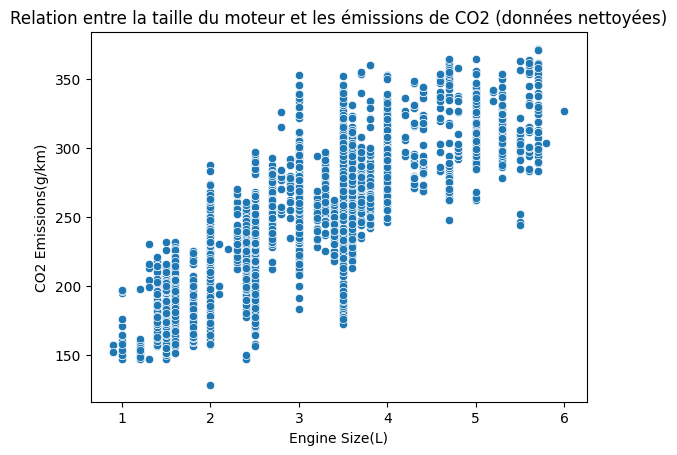

Corrélation Spearman entre Engine Size et CO2 (données nettoyées) : 0.8410432824640407, p-value : 0.0


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Scatter plot pour visualiser la relation avec df_cleaned
sns.scatterplot(data=df_unique, x='Engine Size(L)', y='CO2 Emissions(g/km)')
plt.title("Relation entre la taille du moteur et les émissions de CO2 (données nettoyées)")
plt.show()

# Test de corrélation Spearman avec df_cleaned
corr, p_value = spearmanr(df_unique['Engine Size(L)'], df_unique['CO2 Emissions(g/km)'])
print(f"Corrélation Spearman entre Engine Size et CO2 (données nettoyées) : {corr}, p-value : {p_value}")

Corrélation Spearman entre Engine Size et CO2 (données nettoyées) : 0.8410432824640407, p-value : 0.0
Le graphique de dispersion montre une relation positive claire entre la taille du moteur et les émissions de CO2. De plus, la corrélation Spearman est très élevée et significative, confirmant que cette hypothèse est juste.

Hypothèse 2 : La consommation combinée est positivement corrélée avec les émissions de CO2.

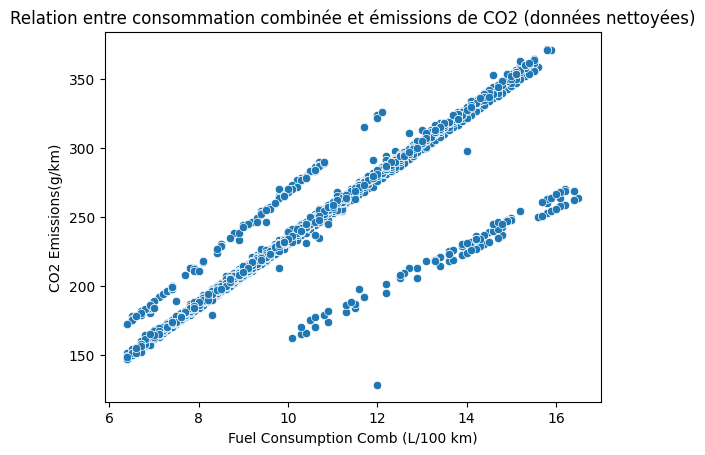

Corrélation Spearman entre Fuel Consumption Comb et CO2 (données nettoyées) : 0.9610066068138796, p-value : 0.0


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Scatter plot pour la consommation combinée avec df_cleaned
sns.scatterplot(data=df_unique, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)')
plt.title("Relation entre consommation combinée et émissions de CO2 (données nettoyées)")
plt.show()

# Test de corrélation Spearman avec df_cleaned
corr, p_value = spearmanr(df_unique['Fuel Consumption Comb (L/100 km)'], df_unique['CO2 Emissions(g/km)'])
print(f"Corrélation Spearman entre Fuel Consumption Comb et CO2 (données nettoyées) : {corr}, p-value : {p_value}")

Le graphique de dispersion indique une forte corrélation positive entre la consommation combinée et les émissions de CO2. La corrélation Spearman utilisée confirme également cette relation avec une valeur proche de 1 et une p-valeur significative, donc cette hypothèse est vérifiée.

Hypothèse 3 :
Les véhicules diesel émettent moins de CO2 que ceux à essence.

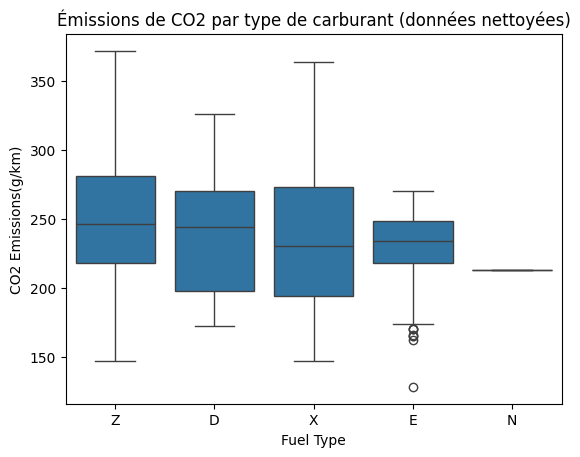

Kruskal-Wallis entre diesel et essence (données nettoyées) : Stat = 11.399961901598786, p-value = 0.0007344561220526068


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Boxplot pour comparer les émissions par type de carburant (données nettoyées)
sns.boxplot(data=df_unique, x='Fuel Type', y='CO2 Emissions(g/km)')
plt.title("Émissions de CO2 par type de carburant (données nettoyées)")
plt.show()

# Test statistique (Kruskal-Wallis) avec df_cleaned
diesel = df_unique[df_unique['Fuel Type'] == 'D']['CO2 Emissions(g/km)']
essence = df_unique[df_unique['Fuel Type'] == 'Z']['CO2 Emissions(g/km)']
stat, p_value = kruskal(diesel, essence)
print(f"Kruskal-Wallis entre diesel et essence (données nettoyées) : Stat = {stat}, p-value = {p_value}")

Le boxplot montre que les véhicules diesel ont des émissions légèrement inférieures à celles des véhicules à essence. Cependant, cette différence n’est pas extrêmement marquée. Le test statistique Kruskal-Wallis confirme que cette différence est significative, ce qui valide partiellement l'hypothèse.

Hypothèse 4 :
La transmission influence significativement les émissions de CO2.

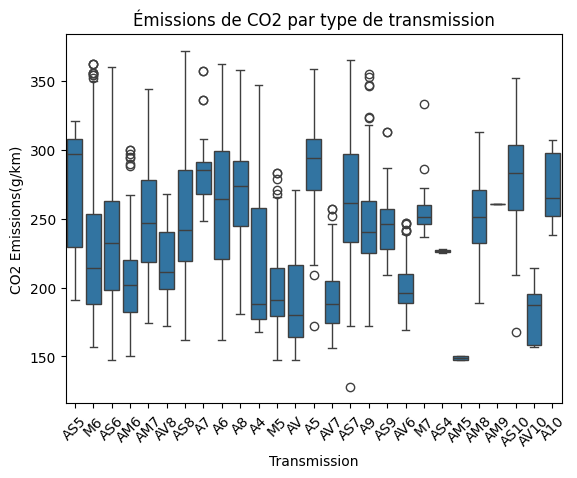

Kruskal-Wallis pour Transmission : Stat = 1316.3539598978248, p-value = 2.0189406646410616e-261


In [56]:
# Boxplot pour visualiser l'influence de la transmission
sns.boxplot(data=df_unique, x='Transmission', y='CO2 Emissions(g/km)')
plt.title("Émissions de CO2 par type de transmission")
plt.xticks(rotation=45)
plt.show()

# Test statistique (ANOVA ou Kruskal-Wallis si les données ne sont pas normales)
groups = [df_unique[df_unique['Transmission'] == t]['CO2 Emissions(g/km)'] for t in df_unique['Transmission'].unique()]
stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis pour Transmission : Stat = {stat}, p-value = {p_value}")

Le boxplot pour les types de transmission montre des variations significatives dans les émissions de CO2 en fonction des types de transmission. Cela est confirmé par le test statistique (Kruskal-Wallis), qui indique une p-valeur significative. Cette hypothèse est donc validée.

# ETAPE 02


preparation des données 

1. Définir les variables :

Features (variables explicatives) :

Numériques : ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders']
Qualitatives : ['Make', 'Fuel Type', 'Transmission'] (qui devront être encodées).

Target (variable cible) :
CO2 Emissions(g/km)

In [60]:
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.dummy import DummyRegressor  # Ajout de l'import
from sklearn.base import BaseEstimator, TransformerMixin

df_normalized = df_unique
# Ignore les avertissements (optionnel)
warnings.filterwarnings('ignore', category=UserWarning, message='.*found unknown categories.*')

# Custom Transformer to Convert Sparse Matrix to Dense
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.toarray() if hasattr(X, "toarray") else X

# Définir les colonnes catégorielles et numériques
cat_features = ['Make', 'Fuel Type', 'Transmission']
num_features = ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders']

# Séparer les features et la cible
X = df_normalized.drop(columns=['CO2 Emissions(g/km)'])
y = df_normalized['CO2 Emissions(g/km)']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline pour les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('to_dense', DenseTransformer())  # Convertir en dense après encodage
        ]), cat_features)
    ]
)

# Ajout des DummyRegressor avec mean et median
models = {
    'Dummy (Mean)': DummyRegressor(strategy="mean"),  # Baseline moyenne
    'Dummy (Median)': DummyRegressor(strategy="median"),  # Baseline médiane
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42)
}

# Résultats pour chaque modèle
results_prof = {}
for name, model in models.items():
    # Pipeline avec le modèle actuel
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Validation croisée pour MSE, MAE et R²
    cv_mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    
    cv_mse = -cv_mse_scores.mean()
    cv_mse_std = cv_mse_scores.std()
    cv_mae = -cv_mae_scores.mean()
    cv_mae_std = cv_mae_scores.std()
    cv_r2 = cv_r2_scores.mean()
    cv_r2_std = cv_r2_scores.std()
    
    # Évaluation sur le jeu de test
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    test_mse = mean_squared_error(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    
    # Stocker les résultats
    results_prof[name] = {
        'CV Mean MSE': cv_mse,
        'CV Std MSE': cv_mse_std,
        'CV Mean MAE': cv_mae,
        'CV Std MAE': cv_mae_std,
        'CV Mean R²': cv_r2,
        'CV Std R²': cv_r2_std,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Test R²': test_r2
    }
    
    # Afficher les résultats
    print(f'{name}:')
    print(f'  Cross-Validation Mean MSE  = {cv_mse:.4f}')
    print(f'  Cross-Validation Std MSE   = {cv_mse_std:.4f}')
    print(f'  Cross-Validation Mean MAE  = {cv_mae:.4f}')
    print(f'  Cross-Validation Std MAE   = {cv_mae_std:.4f}')
    print(f'  Cross-Validation Mean R²   = {cv_r2:.4f}')
    print(f'  Cross-Validation Std R²    = {cv_r2_std:.4f}')
    print(f'  Test Set MSE               = {test_mse:.4f}')
    print(f'  Test Set MAE               = {test_mae:.4f}')
    print(f'  Test Set R²                = {test_r2:.4f}')
    print('-' * 50)

Dummy (Mean):
  Cross-Validation Mean MSE  = 2154.1095
  Cross-Validation Std MSE   = 114.8299
  Cross-Validation Mean MAE  = 38.3479
  Cross-Validation Std MAE   = 1.0873
  Cross-Validation Mean R²   = -0.0043
  Cross-Validation Std R²    = 0.0042
  Test Set MSE               = 2252.5926
  Test Set MAE               = 39.2945
  Test Set R²                = -0.0005
--------------------------------------------------
Dummy (Median):
  Cross-Validation Mean MSE  = 2167.4289
  Cross-Validation Std MSE   = 136.3962
  Cross-Validation Mean MAE  = 38.2745
  Cross-Validation Std MAE   = 1.2462
  Cross-Validation Mean R²   = -0.0101
  Cross-Validation Std R²    = 0.0135
  Test Set MSE               = 2267.0310
  Test Set MAE               = 39.2040
  Test Set R²                = -0.0069
--------------------------------------------------
Linear Regression:
  Cross-Validation Mean MSE  = 244529704791208099840.0000
  Cross-Validation Std MSE   = 438279090984393179136.0000
  Cross-Validation Mean M

 les Dummy Regressors (Mean/Median) ont les pires résultats,

In [64]:
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Ajout de MAE
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import os
import sys

df_normalized = df_unique
warnings.filterwarnings('ignore', category=UserWarning)
os.environ['LIGHTGBM_VERBOSITY'] = '0'
os.environ['CATBOOST_LOGGING_LEVEL'] = 'Silent'

class SilentLogger:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout.close()
        sys.stdout = self._original_stdout

cat_features = ['Make', 'Fuel Type', 'Transmission']
num_features = ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders']

X = df_normalized.drop(columns=['CO2 Emissions(g/km)'])
y = df_normalized['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

models = {
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'SVR': SVR(kernel='rbf')
}

results = {}
cv_folds = 5

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    with SilentLogger():
        # Ajout du scoring MAE
        cv_mse_scores = cross_val_score(pipeline, X_train, y_train, cv=cv_folds, scoring='neg_mean_squared_error')
        cv_mae_scores = cross_val_score(pipeline, X_train, y_train, cv=cv_folds, scoring='neg_mean_absolute_error')  # Nouveau
        cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=cv_folds, scoring='r2')
        pipeline.fit(X_train, y_train)
    
    # Calcul des métriques MAE
    cv_mse = -cv_mse_scores.mean()
    cv_std_mse = cv_mse_scores.std()
    cv_mae = -cv_mae_scores.mean()  # Nouveau
    cv_std_mae = cv_mae_scores.std()  # Nouveau
    cv_r2 = cv_r2_scores.mean()
    cv_std_r2 = cv_r2_scores.std()
    
    y_pred = pipeline.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)  # Nouveau
    test_r2 = r2_score(y_test, y_pred)
    
    # Mise à jour des résultats avec MAE
    results[name] = {
        'CV Mean MSE': cv_mse,
        'CV Std MSE': cv_std_mse,
        'CV Mean MAE': cv_mae,  # Nouveau
        'CV Std MAE': cv_std_mae,  # Nouveau
        'CV Mean R²': cv_r2,
        'CV Std R²': cv_std_r2,
        'Test MSE': test_mse,
        'Test MAE': test_mae,  # Nouveau
        'Test R²': test_r2
    }
    
    print(f"\nModel: {name}")
    print(f"  Cross-Validation Mean MSE: {cv_mse:.4f}")
    print(f"  Cross-Validation Std MSE : {cv_std_mse:.4f}")
    print(f"  Cross-Validation Mean MAE: {cv_mae:.4f}")  # Nouveau
    print(f"  Cross-Validation Std MAE : {cv_std_mae:.4f}")  # Nouveau
    print(f"  Cross-Validation Mean R² : {cv_r2:.4f}")
    print(f"  Cross-Validation Std R²  : {cv_std_r2:.4f}")
    print(f"  Test Set MSE             : {test_mse:.4f}")
    print(f"  Test Set MAE             : {test_mae:.4f}")  # Nouveau
    print(f"  Test Set R²              : {test_r2:.4f}")
    print("-" * 40)


Model: XGBoost
  Cross-Validation Mean MSE: 9.2712
  Cross-Validation Std MSE : 3.4521
  Cross-Validation Mean MAE: 1.9177
  Cross-Validation Std MAE : 0.0487
  Cross-Validation Mean R² : 0.9956
  Cross-Validation Std R²  : 0.0018
  Test Set MSE             : 9.6904
  Test Set MAE             : 1.9500
  Test Set R²              : 0.9957
----------------------------------------

Model: LightGBM
  Cross-Validation Mean MSE: 14.2928
  Cross-Validation Std MSE : 3.5985
  Cross-Validation Mean MAE: 2.2489
  Cross-Validation Std MAE : 0.0434
  Cross-Validation Mean R² : 0.9933
  Cross-Validation Std R²  : 0.0020
  Test Set MSE             : 8.9368
  Test Set MAE             : 2.1647
  Test Set R²              : 0.9960
----------------------------------------

Model: CatBoost
  Cross-Validation Mean MSE: 9.0126
  Cross-Validation Std MSE : 3.2075
  Cross-Validation Mean MAE: 1.9398
  Cross-Validation Std MAE : 0.0296
  Cross-Validation Mean R² : 0.9957
  Cross-Validation Std R²  : 0.0017
  T

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Ajout MAE
from sklearn.dummy import DummyRegressor  # Ajout DummyRegressor
import numpy as np

# Transformer pour convertir les matrices creuses en denses
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.toarray() if hasattr(X, 'toarray') else X

# Pipeline de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('to_dense', DenseTransformer())
        ]), cat_features)
    ]
)

# Définition des modèles à tester avec DummyRegressor
models = {
    'Dummy (Mean)': DummyRegressor(strategy='mean'),  # Nouveau
    'Dummy (Median)': DummyRegressor(strategy='median'),  # Nouveau
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'SVR': SVR()
}

# Configuration de ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Exécution de la validation croisée et évaluation des modèles
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    try:
        # Ajout du scoring MAE
        cv_mse_scores = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='neg_mean_squared_error')
        cv_mae_scores = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='neg_mean_absolute_error')  # Nouveau
        cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='r2')
        
        cv_mse = -np.mean(cv_mse_scores)
        cv_mae = -np.mean(cv_mae_scores)  # Nouveau
        cv_r2 = np.mean(cv_r2_scores)

        # Entraînement final du modèle
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        test_mse = mean_squared_error(y_test, y_pred)
        test_mae = mean_absolute_error(y_test, y_pred)  # Nouveau
        test_r2 = r2_score(y_test, y_pred)

        # Affichage des résultats avec MAE
        print(f'{name}:')
        print(f'  CV Mean MSE: {cv_mse:.4f}')
        print(f'  CV Mean MAE: {cv_mae:.4f}')  # Nouveau
        print(f'  CV Mean R²: {cv_r2:.4f}')
        print(f'  Test MSE: {test_mse:.4f}')
        print(f'  Test MAE: {test_mae:.4f}')  # Nouveau
        print(f'  Test R²: {test_r2:.4f}')
        print('-' * 50)

    except Exception as e:
        print(f"Erreur pour le modèle {name}: {e}")
        print('-' * 50)

Dummy (Mean):
  CV Mean MSE: 2133.6579
  CV Mean MAE: 38.3832
  CV Mean R²: -0.0005
  Test MSE: 2252.5926
  Test MAE: 39.2945
  Test R²: -0.0005
--------------------------------------------------
Dummy (Median):
  CV Mean MSE: 2142.8235
  CV Mean MAE: 38.2731
  CV Mean R²: -0.0049
  Test MSE: 2267.0310
  Test MAE: 39.2040
  Test R²: -0.0069
--------------------------------------------------
Linear Regression:
  CV Mean MSE: 38127410705901190905856.0000
  CV Mean MAE: 2947042483.4656
  CV Mean R²: -17837629053194151936.0000
  Test MSE: 10.5106
  Test MAE: 2.2897
  Test R²: 0.9953
--------------------------------------------------
Ridge Regression:
  CV Mean MSE: 10.1653
  CV Mean MAE: 2.1915
  CV Mean R²: 0.9952
  Test MSE: 10.4351
  Test MAE: 2.3018
  Test R²: 0.9954
--------------------------------------------------
Decision Tree:
  CV Mean MSE: 34.4461
  CV Mean MAE: 4.2690
  CV Mean R²: 0.9839
  Test MSE: 32.1075
  Test MAE: 4.2065
  Test R²: 0.9857
---------------------------------

In [68]:
# comparaison entre cross validation et suffle 
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import numpy as np

df_normalized = df_unique
# Configuration de ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Modèles spécifiques
models = {
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'SVR': SVR()
}

# Exécution de la validation croisée et évaluation des modèles
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    try:
        cv_mse_scores = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='neg_mean_squared_error')
        cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='r2')
        
        cv_mse = -np.mean(cv_mse_scores)  # Conversion des valeurs négatives en MSE positif
        cv_r2 = np.mean(cv_r2_scores)

        # Entraînement final du modèle
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        test_mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)

        # Affichage des résultats
        print(f'{name}:')
        print(f'  CV Mean MSE: {cv_mse:.4f}')
        print(f'  CV Mean R²: {cv_r2:.4f}')
        print(f'  Test MSE: {test_mse:.4f}')
        print(f'  Test R²: {test_r2:.4f}')
        print('-' * 50)

    except Exception as e:
        print(f"Erreur pour le modèle {name}: {e}")
        print('-' * 50)


XGBoost:
  CV Mean MSE: 8.4315
  CV Mean R²: 0.9961
  Test MSE: 9.6904
  Test R²: 0.9957
--------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 3512, number of used features: 58
[LightGBM] [Info] Start training from score 241.933941
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 3512, number of used features: 57
[LightGBM] [Info] Start training from score 242.030182
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [In

####overfiting / enderfiting

In [71]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin

class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.toarray() if hasattr(X, 'toarray') else X

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('to_dense', DenseTransformer())
        ]), cat_features)
    ]
)

df_normalized = df_unique

def plot_learning_curve(pipeline, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, scoring='r2')
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)

    plt.figure()
    plt.title(title)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Score d'entraînement")
    plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Score de validation")
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Score R²")
    plt.legend(loc="best")
    plt.show()

for name, model in models.items():
    if name in ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'Hist Gradient Boosting']:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        print(f"\nGénération de la courbe d'apprentissage pour {name}")
        plot_learning_curve(pipeline, X_train, y_train, title=f"Courbe d'apprentissage - {name}")

In [ ]:
# Définir les variables explicatives (features) et la cible (target)
features = ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders', 'Make', 'Fuel Type', 'Transmission']
target = 'CO2 Emissions(g/km)'

# Séparer les données en variables explicatives (X) et la cible (y)
X = df_unique[features]  # DataFrame des variables explicatives
y = df_unique[target]    # Série des valeurs cibles (émissions de CO2)

# Aperçu des données
print("Aperçu des features :")
print(X.head())
print("\nAperçu de la target :")
print(y.head())



Aperçu des features :
   Fuel Consumption Comb (L/100 km)  Engine Size(L)  Cylinders   Make  \
0                               8.5             2.0          4  ACURA   
1                               9.6             2.4          4  ACURA   
3                              11.1             3.5          6  ACURA   
4                              10.6             3.5          6  ACURA   
5                              10.0             3.5          6  ACURA   

  Fuel Type Transmission  
0         Z          AS5  
1         Z           M6  
3         Z          AS6  
4         Z          AS6  
5         Z          AS6  

Aperçu de la target :
0    196
1    221
3    255
4    244
5    230
Name: CO2 Emissions(g/km), dtype: int64


In [ ]:
# 2. Séparer les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Diviser les données en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifier les dimensions des ensembles obtenus
print("Dimensions des ensembles :")
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")



--- Linear Regression ---
Mean Squared Error (MSE): 10.510181621965483
Coefficient of Determination (R²): 0.9953319670284907


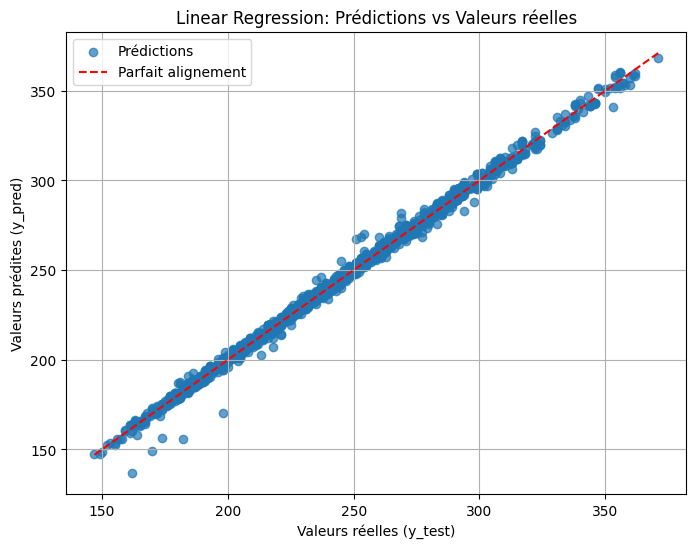

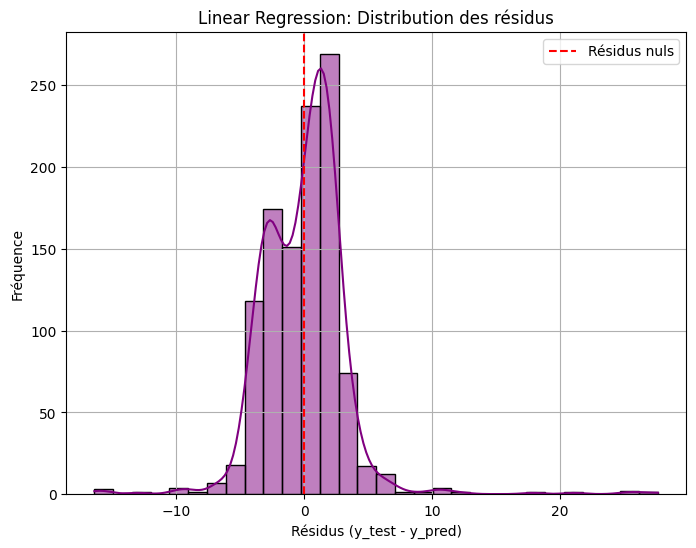


--- Decision Tree ---
Mean Squared Error (MSE): 14.228519158441625
Coefficient of Determination (R²): 0.9936804901231635


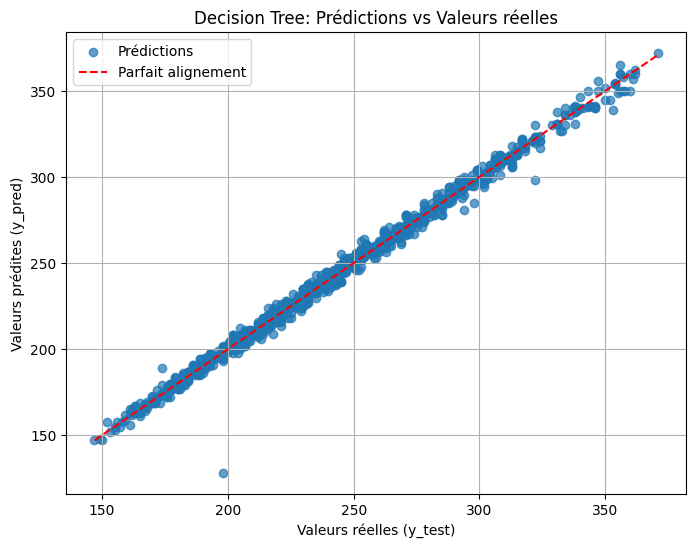

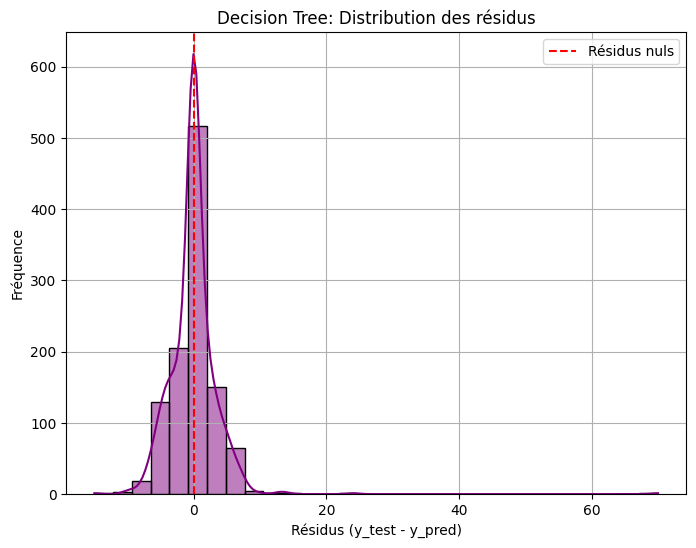

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# 1. Définir les variables explicatives (features) et la cible (target)
features = ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders', 'Make', 'Fuel Type', 'Transmission']
target = 'CO2 Emissions(g/km)'

# Séparer les données en variables explicatives (X) et la cible (y)
X = df_unique[features]  # DataFrame des variables explicatives
y = df_unique[target]    # Série des valeurs cibles (émissions de CO2)

# 2. Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Prétraitement des données
# - Numériques : Standardisation
# - Catégoriques : Encodage One-Hot
numerical_features = ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders']
categorical_features = ['Make', 'Fuel Type', 'Transmission']

# Transformer les colonnes numériques et catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

#4. Création des pipelines pour chaque modèle

# Pipeline pour la régression linéaire
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Pipeline pour l'arbre de décision
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Liste des pipelines et des modèles pour les tester
pipelines = {
    "Linear Regression": pipeline_lr,
    "Decision Tree": pipeline_dt
}

# 5. Tester les pipelines
for model_name, pipeline in pipelines.items():
    print(f"\n--- {model_name} ---")
    
    # Entraîner le modèle
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    
    # Calcul des métriques
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Coefficient of Determination (R²): {r2}")
    
    # Visualisation : Prédictions vs Valeurs réelles
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, label="Prédictions")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Parfait alignement")
    plt.xlabel("Valeurs réelles (y_test)")
    plt.ylabel("Valeurs prédites (y_pred)")
    plt.title(f"{model_name}: Prédictions vs Valeurs réelles")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Visualisation : Distribution des résidus
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=30, color='purple')
    plt.axvline(0, color='red', linestyle='--', label='Résidus nuls')
    plt.xlabel("Résidus (y_test - y_pred)")
    plt.ylabel("Fréquence")
    plt.title(f"{model_name}: Distribution des résidus")
    plt.legend()
    plt.grid()
    plt.show()
    
    
    